# Introduction

In this interactive essay I will go through a process of **scraping** a website in order to get data for linguistic analyis. For the purpose of this analyis [**NLTK**](https://www.nltk.org) (Natural Language Toolkit) will be used, as well as some other Python modules such as **requests** or **BreautifulSoup**. In this particular example I will use [Harvard.edu](https://www.harvard.edu) as the source for the data.

![nltkimg](https://i.imgur.com/gVM8B7X.png)

# Data collection

In [7]:
import requests
from bs4 import BeautifulSoup
import nltk
import matplotlib
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

After importing all the necessary features, we define a variable to which the contents of our page will be assigned. In this case the variable will be called **'page'**.

In [11]:
page = requests.get("https://www.harvard.edu")

Similarly to what was done in the previous line of code, we define a variable - this time we use [**BeatuifulSoup**](https://en.wikipedia.org/wiki/Beautiful_Soup_(HTML_parser)) to assign contents of the page to the variable **'soup'**.

In [12]:
soup = BeautifulSoup(page.content, 'html.parser')

In [22]:
paras = soup.find_all('p')
#print(paras)

This allows us to print the contents of the page. In this example we create a variable **paras** and assign all paragraphs for the scraped page to this variable. For the sake of clarity displaying all the paragraphs is disabled using a comment.

In [14]:
only_text = []
for para in paras:
    processed_para = para.get_text()
    processed_para = processed_para.strip()
    if len(processed_para) > 1:
        only_text.append(processed_para)
print(only_text)

['Meet students and faculty members, explore lessons from history, and discover what is happening today in the LGBTQ+ community.', "At Harvard, we believe that our commitment to equity, diversity, inclusion, and belonging is foundational for every community member's pursuit of excellence.", 'Kailey Nicholson, Harvard College', 'A neuroscience concentrator from Virginia, Kailey graduated this May and participated in the Lavender Graduation.', 'Eve L. Howe, Harvard Law School', 'After finishing her Navy stint and before matriculating at the Law School, Eve spent a year working at Casa Ruby, which provides health and social services for LGBTQ youth and adults in Washington, D.C.', 'Cody Hooks, Harvard Divinity School', 'The summer before starting at the Divinity School, Cody Hooks undertook a pilgrimage through northern New Mexico to visit LGBTQIA+ elders and gather up fragments of their collective history.', 'Alex Chen on Florida’s Parental Rights in Education bill and its effect on LGBT

As you can see in the above example we can display the text from the page in a more visually appealing way using an empty list and appending it using a simple **for** loop.

# Data analysis

In [15]:
tuples = []
for sentence in only_text:
    tokenized = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokenized)
    for item in tagged:
        tuples.append(item)

print(tuples)

[('Meet', 'JJ'), ('students', 'NNS'), ('and', 'CC'), ('faculty', 'NN'), ('members', 'NNS'), (',', ','), ('explore', 'VBP'), ('lessons', 'NNS'), ('from', 'IN'), ('history', 'NN'), (',', ','), ('and', 'CC'), ('discover', 'VB'), ('what', 'WP'), ('is', 'VBZ'), ('happening', 'VBG'), ('today', 'NN'), ('in', 'IN'), ('the', 'DT'), ('LGBTQ+', 'NNP'), ('community', 'NN'), ('.', '.'), ('At', 'IN'), ('Harvard', 'NNP'), (',', ','), ('we', 'PRP'), ('believe', 'VBP'), ('that', 'IN'), ('our', 'PRP$'), ('commitment', 'NN'), ('to', 'TO'), ('equity', 'NN'), (',', ','), ('diversity', 'NN'), (',', ','), ('inclusion', 'NN'), (',', ','), ('and', 'CC'), ('belonging', 'NN'), ('is', 'VBZ'), ('foundational', 'JJ'), ('for', 'IN'), ('every', 'DT'), ('community', 'NN'), ('member', 'NN'), ("'s", 'POS'), ('pursuit', 'NN'), ('of', 'IN'), ('excellence', 'NN'), ('.', '.'), ('Kailey', 'NNP'), ('Nicholson', 'NNP'), (',', ','), ('Harvard', 'NNP'), ('College', 'NNP'), ('A', 'DT'), ('neuroscience', 'NN'), ('concentrator', 'N

In the output above we create an empty tuple in which we insert [**tokenized**](https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization) words using the **word_tokenize** feature of nltk. In this list we have a list of tuples, each containing a token and its corresponding part of speech, for example in ('members', 'NNS') stands for a proper noun.

In [16]:
counter_dict = {}
for item in tuples:
    if item[1] not in counter_dict:
        counter_dict[item[1]] = 1
    else:
        counter_dict[item[1]] += 1

print(counter_dict)

{'JJ': 28, 'NNS': 29, 'CC': 29, 'NN': 79, ',': 31, 'VBP': 6, 'IN': 52, 'VB': 6, 'WP': 1, 'VBZ': 7, 'VBG': 8, 'DT': 32, 'NNP': 99, '.': 13, 'PRP': 1, 'PRP$': 7, 'TO': 6, 'POS': 1, 'VBD': 10, 'VBN': 4, 'WDT': 4, 'RP': 1, 'NNPS': 3, 'MD': 2, 'RBR': 2, 'WRB': 1, 'CD': 3, 'RB': 1}


In the code above we create a dictionary in which the key is a part of speech and value is the number of corresponding occurances. We can then display it using a module called [**matplotlib**](https://matplotlib.org). It allows us to create charts in order to visualize our data.

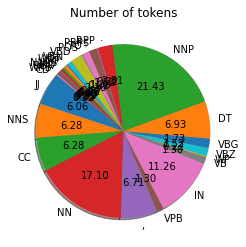

In [17]:
import matplotlib.pyplot as plt

tokens = [28,29,29,79, 31, 6, 52, 6, 1, 7, 8, 32, 99, 13, 1, 7, 6, 1, 10, 4, 1, 3, 2, 2, 1, 3,1]
slice_labels = ['JJ', 'NNS', 'CC', 'NN', ',', 'VPB', 'IN', 'VB', 'WP', 'VBZ', 'VBG', 'DT', 'NNP', '.', 'RPP', 'PRP$', 'TO', 'POS', 'VBD', 'VBN', 'WDT', 'RP', 'NNPS', 'MD', 'RBR', 'WRB', 'CD']

plt.pie(tokens, labels = slice_labels, startangle=140, shadow=True, autopct='%.2f')

plt.title("Number of tokens")

plt.show()

As you can see in the example above, the piechart includes too much data to be easily readable. This is why we will only include those parts of speech which occur 10 times or more.

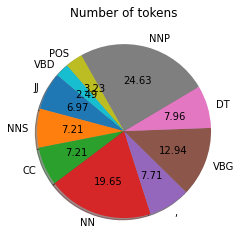

In [18]:
import matplotlib.pyplot as plt

tokens = [28,29,29,79, 31,52, 32, 99, 13,10]
slice_labels = ['JJ', 'NNS', 'CC', 'NN', ',', 'VBG', 'DT', 'NNP', 'POS', 'VBD']

plt.pie(tokens, labels = slice_labels, startangle=140, shadow=True, autopct='%.2f')

plt.title("Number of tokens")

plt.show()

Now we can clearly see in the chart that nouns (NNP and NN) are the most common occurances in the text.

In [19]:
from nltk.corpus import stopwords
stopsEnglish = set(stopwords.words('english'))
print(stopsEnglish)

{'wouldn', "don't", 'from', "didn't", 'been', "needn't", "shouldn't", 'in', "haven't", 'doing', 'he', 'these', 'most', "you'd", 'hers', 'other', 'doesn', 'his', "that'll", 'ours', "couldn't", 'off', 'over', 'myself', 'd', "isn't", 'mightn', 'after', 'am', 'and', 'theirs', 'all', 'your', 'we', 'she', 'mustn', 'does', 'needn', 'each', 'few', 'so', 'ain', 'what', 're', 'isn', 'wasn', 'under', 's', 'can', "aren't", 'for', 'him', 'such', 'me', 'haven', 'which', 'our', 'than', 'by', 'between', "hasn't", "won't", 'ourselves', 'when', 'who', 'their', 'same', 'some', 'any', 'again', 'up', 'not', 'being', 'there', 'with', 'weren', 'of', 'no', "wouldn't", 'down', "you'll", "hadn't", 'was', 'itself', 'her', 'just', 'yours', 'they', 'during', 'o', 'hasn', 'if', 'through', 'how', 'my', 'an', 'do', 'didn', 'about', "should've", 'has', 'a', 'it', 'nor', 'shouldn', 'you', 'more', 'very', "you're", 'against', 'its', 'at', 'out', 'having', 'to', 'why', 'yourself', 'further', 'ma', 't', "you've", 'both', 

Another useful feature that NLTK allows us to do is displaying words which we would usually ommit during linguistic analysis. These words are known as [**stopwords**](https://kavita-ganesan.com/what-are-stop-words/).

In [23]:
from nltk.corpus import stopwords
stopsEnglish = stopwords.words('english')
allwords = ['Meet', 'students', 'and', 'faculty', 'members', 'explore', 'lessons', 'from', 'history', 'and', 'discover',
             'what', 'is', 'happening', 'today', 'in', 'the', 'LGBTQ+', 'community']
print(allwords)
wordsWithoutStops = []
for word in allwords:
    if word not in stopsEnglish:
        wordsWithoutStops.append(word)
print(wordsWithoutStops)

['Meet', 'students', 'and', 'faculty', 'members', 'explore', 'lessons', 'from', 'history', 'and', 'discover', 'what', 'is', 'happening', 'today', 'in', 'the', 'LGBTQ+', 'community']
['Meet', 'students', 'faculty', 'members', 'explore', 'lessons', 'history', 'discover', 'happening', 'today', 'LGBTQ+', 'community']


In the example above we reduced the first set of words taken from a sentece from the scraped website and the result is a list of words excluding all the stopwords.

All the example above are only the fraction of what NLTK and the aforementioned modules can do. They are a powerful resource for all kinds of NLP use and one of the most important parts of NLP students' capabilites.